In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def compare_evalues(file1, file2):
    # Read the tab-delimited files into DataFrames
    df1 = pd.read_csv(file1, sep='\t')
    df2 = pd.read_csv(file2, sep='\t')
    
    # Round the 'Open Modification Mass' column to the nearest integer
    df1['Open Modification Mass'] = df1['Open Modification Mass'].round().astype(int)
    df2['Open Modification Mass'] = df2['Open Modification Mass'].round().astype(int)
    
    # Determine the e-value column name for each file
    evalue_col1 = determine_evalue_column(df1)
    evalue_col2 = determine_evalue_column(df2)
    
    # Create a function to extract distinct peptide information
    def get_distinct_peptide(row):
        return f"{row['PEPTIDE']}_{row['MODS']}_{row['Open Modification Mass']}"
    
    # Apply the function to create a new column for distinct peptide
    df1['Distinct Peptide'] = df1.apply(get_distinct_peptide, axis=1)
    df2['Distinct Peptide'] = df2.apply(get_distinct_peptide, axis=1)
    
    # Create a map with scan number as key and distinct peptide map as value
    scan_peptide_map1 = {}
    scan_peptide_map2 = {}
    
    for _, row in df1.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        evalue = row[evalue_col1]
        
        if scan_num not in scan_peptide_map1:
            scan_peptide_map1[scan_num] = {}
        scan_peptide_map1[scan_num][peptide] = evalue
    
    for _, row in df2.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        evalue = row[evalue_col2]
        
        if scan_num not in scan_peptide_map2:
            scan_peptide_map2[scan_num] = {}
        scan_peptide_map2[scan_num][peptide] = evalue
    
    # Create lists to store the logarithm of e-values for plotting
    log_evalues1 = []
    log_evalues2 = []
    
    # Iterate over the scan numbers and distinct peptides
    for scan_num in scan_peptide_map1:
        if scan_num in scan_peptide_map2:
            for peptide in scan_peptide_map1[scan_num]:
                if peptide in scan_peptide_map2[scan_num]:
                    evalue1 = scan_peptide_map1[scan_num][peptide]
                    evalue2 = scan_peptide_map2[scan_num][peptide]
                    log_evalues1.append(np.log10(evalue1))
                    log_evalues2.append(np.log10(evalue2))
    
    # Fit a linear regression line using the logarithm of e-values
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_evalues1, log_evalues2)
    
    # Create a new array of x-coordinates for the regression line and x=y line
    x_min = min(log_evalues1)
    x_max = max(log_evalues1)
    x_line = np.linspace(x_min, x_max, 100)
    
    # Create the scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(log_evalues1, log_evalues2, alpha=0.5)
    plt.plot(x_line, slope * x_line + intercept, color='red', label='Linear Regression')
    plt.plot(x_line, x_line, color='black', linestyle='--', label='x=y')
    plt.xlabel('Log10(E-Value) (File 1)')
    plt.ylabel('Log10(E-Value) (File 2)')
    plt.title('Comparison of E-Values (Log Scale)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Print the regression results
    print("Regression Results:")
    print(f"Slope: {slope}")
    print(f"Y-Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")

def determine_evalue_column(df):
    if 'E-Value (Magnum)' in df.columns:
        return 'E-Value (Magnum)'
    elif 'Evalue (Magnum)' in df.columns:
        return 'Evalue (Magnum)'
    else:
        raise ValueError("E-value column not found in the input file.")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import gaussian_kde

def compare_mscores(file1, file2):
    # Read the tab-delimited files into DataFrames
    df1 = pd.read_csv(file1, sep='\t')
    df2 = pd.read_csv(file2, sep='\t')
    
    # Round the 'Open Modification Mass' column to the nearest integer
    df1['Open Modification Mass'] = df1['Open Modification Mass'].round().astype(int)
    df2['Open Modification Mass'] = df2['Open Modification Mass'].round().astype(int)
    
    # Determine the Mscore column name for each file
    mscore_col1 = determine_mscore_column(df1)
    mscore_col2 = determine_mscore_column(df2)
    
    # Create a function to extract distinct peptide information
    def get_distinct_peptide(row):
        return f"{row['PEPTIDE']}_{row['MODS']}_{row['Open Modification Mass']}"
    
    # Apply the function to create a new column for distinct peptide
    df1['Distinct Peptide'] = df1.apply(get_distinct_peptide, axis=1)
    df2['Distinct Peptide'] = df2.apply(get_distinct_peptide, axis=1)
    
    # Create a map with scan number as key and distinct peptide map as value
    scan_peptide_map1 = {}
    scan_peptide_map2 = {}
    
    for _, row in df1.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        mscore = row[mscore_col1]
        
        if scan_num not in scan_peptide_map1:
            scan_peptide_map1[scan_num] = {}
        scan_peptide_map1[scan_num][peptide] = mscore
    
    for _, row in df2.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        mscore = row[mscore_col2]
        
        if scan_num not in scan_peptide_map2:
            scan_peptide_map2[scan_num] = {}
        scan_peptide_map2[scan_num][peptide] = mscore
    
    # Create lists to store the Mscores for plotting
    mscores1 = []
    mscores2 = []
    
    # Iterate over the scan numbers and distinct peptides
    for scan_num in scan_peptide_map1:
        if scan_num in scan_peptide_map2:
            for peptide in scan_peptide_map1[scan_num]:
                if peptide in scan_peptide_map2[scan_num]:
                    mscore1 = scan_peptide_map1[scan_num][peptide]
                    mscore2 = scan_peptide_map2[scan_num][peptide]
                    mscores1.append(mscore1)
                    mscores2.append(mscore2)
    
    # Convert mscores1 and mscores2 to numpy arrays
    mscores1 = np.array(mscores1)
    mscores2 = np.array(mscores2)
    
    # Create a density plot
    xy = np.vstack([mscores1, mscores2])
    z = gaussian_kde(xy)(xy)
    
    # Sort the points by density
    idx = z.argsort()
    x, y, z = mscores1[idx.ravel()], mscores2[idx.ravel()], z[idx.ravel()]
    
    # Fit a linear regression line using the Mscores
    slope, intercept, r_value, p_value, std_err = stats.linregress(mscores1, mscores2)
    
    # Create a new array of x-coordinates for the regression line and x=y line
    x_min = min(mscores1)
    x_max = max(mscores1)
    x_line = np.linspace(x_min, x_max, 100)
    
    # Create the scatter plot with density
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(x, y, c=z, cmap='viridis', alpha=0.5, s=plt.rcParams['lines.markersize'] ** 2 / 4)
    ax.plot(x_line, slope * x_line + intercept, color='red', label='Linear Regression')
    ax.plot(x_line, x_line, color='black', linestyle='--', label='x=y')
    ax.set_xlabel('Mscore (File 1)')
    ax.set_ylabel('Mscore (File 2)')
    ax.set_title('Comparison of Mscores')
    ax.grid(True)
    ax.legend()
    
    # Add a colorbar for density
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Density')
    
    plt.show()
    
    # Print the regression results
    print("Regression Results:")
    print(f"Slope: {slope}")
    print(f"Y-Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    
    return mscores1.shape

def determine_mscore_column(df):
    if 'Mscore (Magnum)' in df.columns:
        return 'Mscore (Magnum)'
    elif 'Score (Magnum)' in df.columns:
        return 'Score (Magnum)'
    else:
        raise ValueError("Mscore column not found in the input file.")

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import gaussian_kde

def compare_qvalues(file1, file2):
    # Read the tab-delimited files into DataFrames
    df1 = pd.read_csv(file1, sep='\t')
    df2 = pd.read_csv(file2, sep='\t')
    
    # Round the 'Open Modification Mass' column to the nearest integer
    df1['Open Modification Mass'] = df1['Open Modification Mass'].round().astype(int)
    df2['Open Modification Mass'] = df2['Open Modification Mass'].round().astype(int)
    
    # Create a function to extract distinct peptide information
    def get_distinct_peptide(row):
        return f"{row['PEPTIDE']}_{row['MODS']}_{row['Open Modification Mass']}"
    
    # Apply the function to create a new column for distinct peptide
    df1['Distinct Peptide'] = df1.apply(get_distinct_peptide, axis=1)
    df2['Distinct Peptide'] = df2.apply(get_distinct_peptide, axis=1)
    
    # Create a map with scan number as key and distinct peptide map as value
    scan_peptide_map1 = {}
    scan_peptide_map2 = {}
    
    for _, row in df1.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        qvalue = row['q-value (Percolator)']
        
        if scan_num not in scan_peptide_map1:
            scan_peptide_map1[scan_num] = {}
        scan_peptide_map1[scan_num][peptide] = qvalue
    
    for _, row in df2.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        qvalue = row['q-value (Percolator)']
        
        if scan_num not in scan_peptide_map2:
            scan_peptide_map2[scan_num] = {}
        scan_peptide_map2[scan_num][peptide] = qvalue
    
    # Create lists to store the q-values for plotting
    qvalues1 = []
    qvalues2 = []
    
    # Iterate over the scan numbers and distinct peptides
    for scan_num in scan_peptide_map1:
        if scan_num in scan_peptide_map2:
            for peptide in scan_peptide_map1[scan_num]:
                if peptide in scan_peptide_map2[scan_num]:
                    qvalue1 = scan_peptide_map1[scan_num][peptide]
                    qvalue2 = scan_peptide_map2[scan_num][peptide]
                    qvalues1.append(qvalue1)
                    qvalues2.append(qvalue2)
    
    # Convert qvalues1 and qvalues2 to numpy arrays
    qvalues1 = np.array(qvalues1)
    qvalues2 = np.array(qvalues2)
    
    # Take the logarithm of the q-values
    log_qvalues1 = np.log10(qvalues1)
    log_qvalues2 = np.log10(qvalues2)
    
    # Create a density plot
    xy = np.vstack([log_qvalues1, log_qvalues2])
    z = gaussian_kde(xy)(xy)
    
    # Sort the points by density
    idx = z.argsort()
    x, y, z = log_qvalues1[idx.ravel()], log_qvalues2[idx.ravel()], z[idx.ravel()]
    
    # Fit a linear regression line using the logarithm of q-values
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_qvalues1, log_qvalues2)
    
    # Create a new array of x-coordinates for the regression line and x=y line
    x_min = min(log_qvalues1)
    x_max = max(log_qvalues1)
    x_line = np.linspace(x_min, x_max, 100)
    
    # Create the scatter plot with density
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(x, y, c=z, cmap='viridis', alpha=0.5, s=plt.rcParams['lines.markersize'] ** 2 / 4)
    ax.plot(x_line, slope * x_line + intercept, color='red', label='Linear Regression')
    ax.plot(x_line, x_line, color='black', linestyle='--', label='x=y')
    ax.set_xlabel('Log10(q-value) (File 1)')
    ax.set_ylabel('Log10(q-value) (File 2)')
    ax.set_title('Comparison of q-values (Log Scale)')
    ax.grid(True)
    ax.legend()
    
    # Add a colorbar for density
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Density')
    
    plt.show()
    
    # Print the regression results
    print("Regression Results:")
    print(f"Slope: {slope}")
    print(f"Y-Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    
    return log_qvalues1.shape


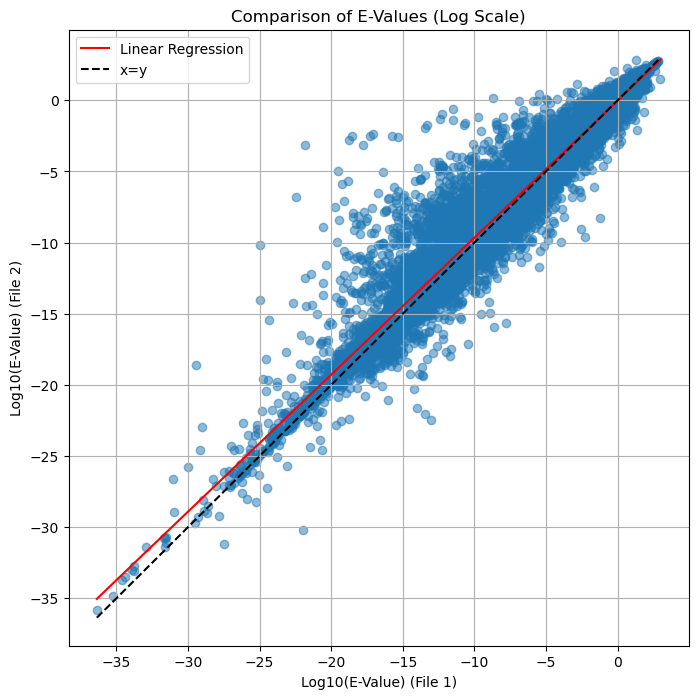

Regression Results:
Slope: 0.9627701478671962
Y-Intercept: -0.027591949344671463
R-squared: 0.9654995231392571


In [3]:
file1 = '/Users/michaelriffle/magnum-scatter/v1dev11.txt'
file2 = '/Users/michaelriffle/magnum-scatter/1.3.2.txt'

compare_evalues(file1, file2)


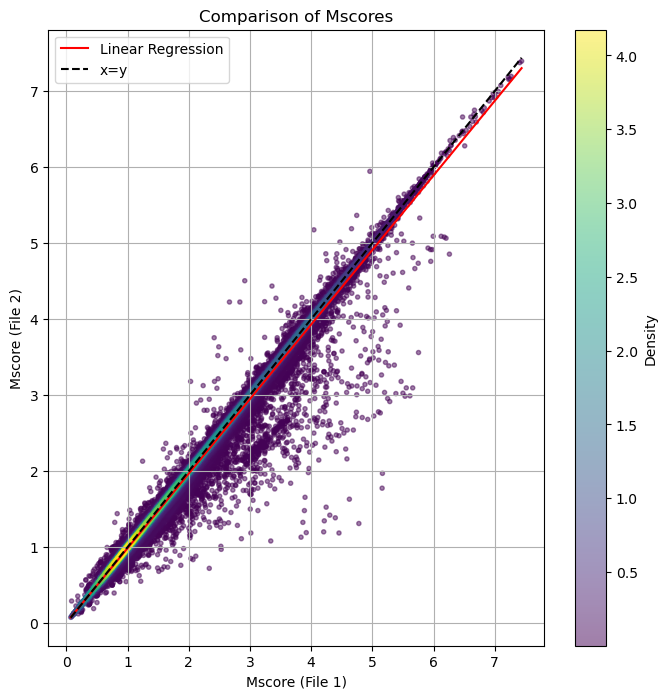

Regression Results:
Slope: 0.980852690686758
Y-Intercept: 0.005321527494138056
R-squared: 0.9825086120946998


(43599,)

In [4]:
compare_mscores(file1, file2)


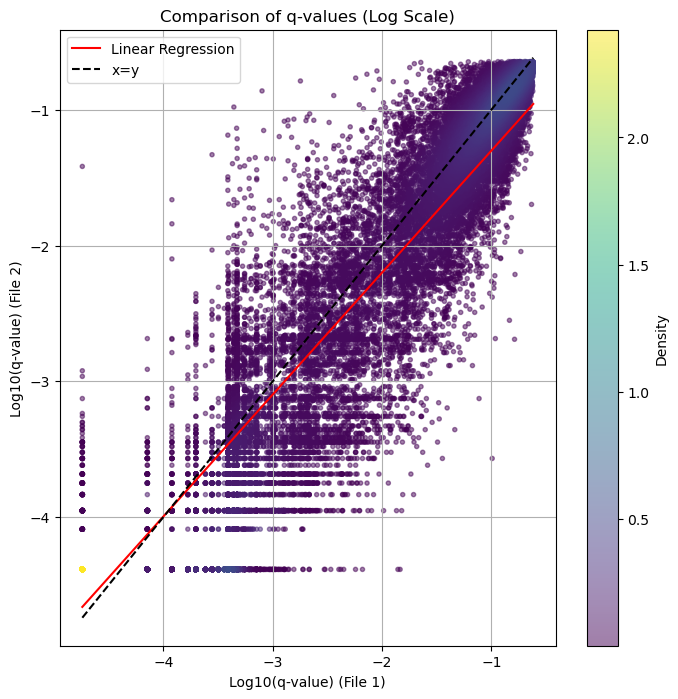

Regression Results:
Slope: 0.8981340879157834
Y-Intercept: -0.40332690083664646
R-squared: 0.8821134091265793


(43599,)

In [12]:
compare_qvalues(file1, file2)


In [5]:
import pandas as pd

def find_unique_peptides(file1, file2):
    # Read the tab-delimited files into DataFrames
    df1 = pd.read_csv(file1, sep='\t')
    df2 = pd.read_csv(file2, sep='\t')
    
    # Round the 'Open Modification Mass' column to the nearest integer
    df1['Open Modification Mass'] = df1['Open Modification Mass'].round().astype(int)
    df2['Open Modification Mass'] = df2['Open Modification Mass'].round().astype(int)
    
    # Create a function to extract distinct peptide information
    def get_distinct_peptide(row):
        return f"{row['PEPTIDE']}_{row['MODS']}_{row['Open Modification Mass']}"
    
    # Apply the function to create a new column for distinct peptide
    df1['Distinct Peptide'] = df1.apply(get_distinct_peptide, axis=1)
    df2['Distinct Peptide'] = df2.apply(get_distinct_peptide, axis=1)
    
    # Create a new column combining scan number and distinct peptide
    df1['Scan_Peptide'] = df1['SCAN NUMBER'].astype(str) + '_' + df1['Distinct Peptide']
    df2['Scan_Peptide'] = df2['SCAN NUMBER'].astype(str) + '_' + df2['Distinct Peptide']
    
    # Find the combinations of scan number and distinct peptide unique to each file
    unique_to_file1 = set(df1['Scan_Peptide']) - set(df2['Scan_Peptide'])
    unique_to_file2 = set(df2['Scan_Peptide']) - set(df1['Scan_Peptide'])
    
    # Create DataFrames for unique combinations in each file
    unique_df1 = pd.DataFrame({'Scan_Peptide': list(unique_to_file1)})
    unique_df2 = pd.DataFrame({'Scan_Peptide': list(unique_to_file2)})
    
    # Split the 'Scan_Peptide' column into 'SCAN NUMBER' and 'Distinct Peptide' columns
    unique_df1[['SCAN NUMBER', 'Distinct Peptide']] = unique_df1['Scan_Peptide'].str.split('_', n=1, expand=True)
    unique_df2[['SCAN NUMBER', 'Distinct Peptide']] = unique_df2['Scan_Peptide'].str.split('_', n=1, expand=True)
    
    # Reorder the columns
    unique_df1 = unique_df1[['SCAN NUMBER', 'Distinct Peptide']]
    unique_df2 = unique_df2[['SCAN NUMBER', 'Distinct Peptide']]
    
    # Write the unique combinations to separate files as tab-delimited data
    unique_df1.to_csv('unique_to_file1.txt', sep='\t', index=False)
    unique_df2.to_csv('unique_to_file2.txt', sep='\t', index=False)
    
    print(f"Found {len(unique_to_file1)} combinations of scan number and distinct peptide unique to {file1}.")
    print("Unique combinations written to 'unique_to_file1.txt'.")
    print(f"Found {len(unique_to_file2)} combinations of scan number and distinct peptide unique to {file2}.")
    print("Unique combinations written to 'unique_to_file2.txt'.")

In [6]:
find_unique_peptides(file1, file2)


Found 26840 combinations of scan number and distinct peptide unique to /Users/michaelriffle/magnum-scatter/v1dev11.txt.
Unique combinations written to 'unique_to_file1.txt'.
Found 18637 combinations of scan number and distinct peptide unique to /Users/michaelriffle/magnum-scatter/1.3.2.txt.
Unique combinations written to 'unique_to_file2.txt'.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_value_difference(file1, file2, col_names, take_log=False):
    # Read the tab-delimited files into DataFrames
    df1 = pd.read_csv(file1, sep='\t')
    df2 = pd.read_csv(file2, sep='\t')
    
    # Round the 'Open Modification Mass' column to the nearest integer
    df1['Open Modification Mass'] = df1['Open Modification Mass'].round().astype(int)
    df2['Open Modification Mass'] = df2['Open Modification Mass'].round().astype(int)
    
    # Create a function to extract distinct peptide information
    def get_distinct_peptide(row):
        return f"{row['PEPTIDE']}_{row['MODS']}_{row['Open Modification Mass']}"
    
    # Apply the function to create a new column for distinct peptide
    df1['Distinct Peptide'] = df1.apply(get_distinct_peptide, axis=1)
    df2['Distinct Peptide'] = df2.apply(get_distinct_peptide, axis=1)
    
    # Determine the column name for each file
    col_name1 = determine_column_name(df1, col_names)
    col_name2 = determine_column_name(df2, col_names)
    
    # Create a map with scan number as key and distinct peptide map as value
    scan_peptide_map1 = {}
    scan_peptide_map2 = {}
    
    for _, row in df1.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        value = row[col_name1]
        
        if scan_num not in scan_peptide_map1:
            scan_peptide_map1[scan_num] = {}
        scan_peptide_map1[scan_num][peptide] = value
    
    for _, row in df2.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        value = row[col_name2]
        
        if scan_num not in scan_peptide_map2:
            scan_peptide_map2[scan_num] = {}
        scan_peptide_map2[scan_num][peptide] = value
    
    # Create a list to store the value differences
    value_diffs = []
    
    # Iterate over the scan numbers and distinct peptides
    for scan_num in scan_peptide_map1:
        if scan_num in scan_peptide_map2:
            for peptide in scan_peptide_map1[scan_num]:
                if peptide in scan_peptide_map2[scan_num]:
                    value1 = scan_peptide_map1[scan_num][peptide]
                    value2 = scan_peptide_map2[scan_num][peptide]
                    
                    # Apply logarithmic transformation if specified
                    if take_log:
                        value_diff = np.log10(value1) - np.log10(value2)
                    else:
                        value_diff = value1 - value2
                    
                    value_diffs.append(value_diff)
    
    # Create a figure for the probability density plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the probability density
    kde = gaussian_kde(value_diffs)
    x = np.linspace(min(value_diffs), max(value_diffs), 100)
    ax.plot(x, kde(x), linewidth=2)
    
    if take_log:
        ax.set_xlabel(f"Log10 Difference of {col_name1.split(' ')[0]} (File1 - File2)")
        ax.set_title(f"Probability Density of Log10 Difference of {col_name1.split(' ')[0]}")
    else:
        ax.set_xlabel(f"{col_name1.split(' ')[0]} Difference (File1 - File2)")
        ax.set_title(f"Probability Density of {col_name1.split(' ')[0]} Differences")
    
    ax.set_ylabel('Probability Density')
    
    # Add a red reference line at x = 0
    ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
    
    plt.tight_layout()
    plt.show()

def determine_column_name(df, col_names):
    for col_name in col_names:
        if col_name in df.columns:
            return col_name
    raise ValueError("Column not found in the input file.")

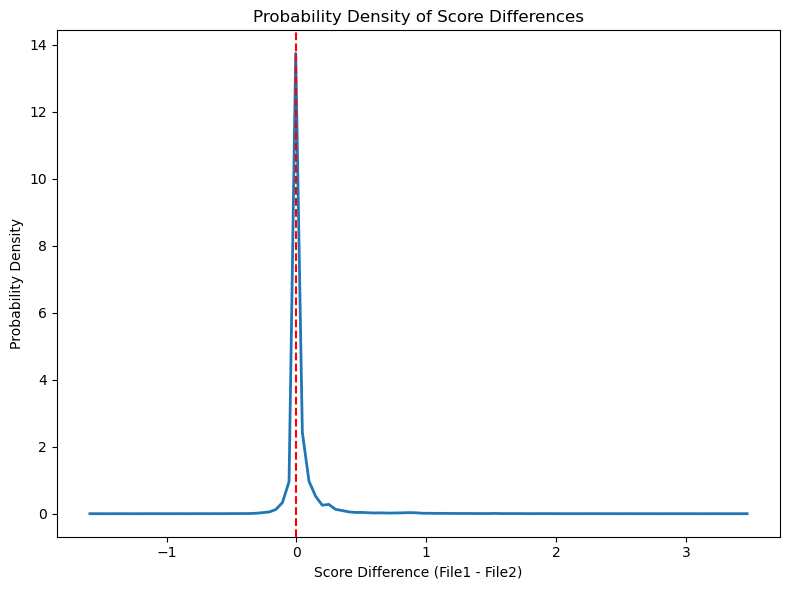

In [29]:
plot_value_difference(file1, file2, ['Mscore (Magnum)', 'Score (Magnum)'], take_log=False)


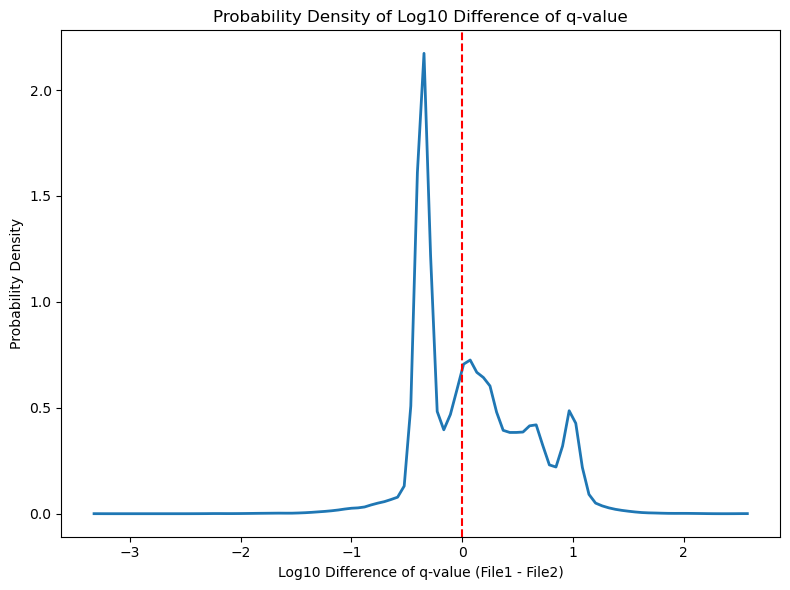

In [32]:
plot_value_difference(file1, file2, ['q-value (Percolator)'], take_log=True)


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_unique_value_distributions(file1, file2, col_names, take_log=False):
    # Read the tab-delimited files into DataFrames
    df1 = pd.read_csv(file1, sep='\t')
    df2 = pd.read_csv(file2, sep='\t')
    
    # Round the 'Open Modification Mass' column to the nearest integer
    df1['Open Modification Mass'] = df1['Open Modification Mass'].round().astype(int)
    df2['Open Modification Mass'] = df2['Open Modification Mass'].round().astype(int)
    
    # Create a function to extract distinct peptide information
    def get_distinct_peptide(row):
        return f"{row['PEPTIDE']}_{row['MODS']}_{row['Open Modification Mass']}"
    
    # Apply the function to create a new column for distinct peptide
    df1['Distinct Peptide'] = df1.apply(get_distinct_peptide, axis=1)
    df2['Distinct Peptide'] = df2.apply(get_distinct_peptide, axis=1)
    
    # Determine the column name for each file
    col_name1 = determine_column_name(df1, col_names)
    col_name2 = determine_column_name(df2, col_names)
    
    # Create a map with scan number as key and distinct peptide map as value
    scan_peptide_map1 = {}
    scan_peptide_map2 = {}
    
    for _, row in df1.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        value = row[col_name1]
        
        if scan_num not in scan_peptide_map1:
            scan_peptide_map1[scan_num] = {}
        scan_peptide_map1[scan_num][peptide] = value
    
    for _, row in df2.iterrows():
        scan_num = row['SCAN NUMBER']
        peptide = row['Distinct Peptide']
        value = row[col_name2]
        
        if scan_num not in scan_peptide_map2:
            scan_peptide_map2[scan_num] = {}
        scan_peptide_map2[scan_num][peptide] = value
    
    # Create lists to store the unique and non-unique values for each file
    unique_values1 = []
    unique_values2 = []
    non_unique_values1 = []
    non_unique_values2 = []
    
    # Find unique and non-unique items in file1
    for scan_num in scan_peptide_map1:
        for peptide in scan_peptide_map1[scan_num]:
            value = scan_peptide_map1[scan_num][peptide]
            if take_log:
                value = np.log10(value)
            
            if scan_num not in scan_peptide_map2 or peptide not in scan_peptide_map2[scan_num]:
                unique_values1.append(value)
            else:
                non_unique_values1.append(value)
    
    # Find unique and non-unique items in file2
    for scan_num in scan_peptide_map2:
        for peptide in scan_peptide_map2[scan_num]:
            value = scan_peptide_map2[scan_num][peptide]
            if take_log:
                value = np.log10(value)
            
            if scan_num not in scan_peptide_map1 or peptide not in scan_peptide_map1[scan_num]:
                unique_values2.append(value)
            else:
                non_unique_values2.append(value)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the probability density for unique and non-unique items in file1
    kde1_unique = gaussian_kde(unique_values1)
    kde1_non_unique = gaussian_kde(non_unique_values1)
    x1 = np.linspace(min(unique_values1 + non_unique_values1), max(unique_values1 + non_unique_values1), 100)
    ax1.plot(x1, kde1_unique(x1), linewidth=2, label='Unique to File1')
    ax1.plot(x1, kde1_non_unique(x1), linewidth=2, linestyle='--', color='red', label='Not Unique to File1')
    
    if take_log:
        ax1.set_xlabel(f"Log10 of {col_name1.split(' ')[0]} (File1)")
        ax1.set_title(f"Probability Density of Log10 of {col_name1.split(' ')[0]} (File1)")
    else:
        ax1.set_xlabel(f"{col_name1.split(' ')[0]} (File1)")
        ax1.set_title(f"Probability Density of {col_name1.split(' ')[0]} (File1)")
    
    ax1.set_ylabel('Probability Density')
    ax1.legend()
    
    # Plot the probability density for unique and non-unique items in file2
    kde2_unique = gaussian_kde(unique_values2)
    kde2_non_unique = gaussian_kde(non_unique_values2)
    x2 = np.linspace(min(unique_values2 + non_unique_values2), max(unique_values2 + non_unique_values2), 100)
    ax2.plot(x2, kde2_unique(x2), linewidth=2, label='Unique to File2')
    ax2.plot(x2, kde2_non_unique(x2), linewidth=2, linestyle='--', color='red', label='Not Unique to File2')
    
    if take_log:
        ax2.set_xlabel(f"Log10 of {col_name2.split(' ')[0]} (File2)")
        ax2.set_title(f"Probability Density of Log10 of {col_name2.split(' ')[0]} (File2)")
    else:
        ax2.set_xlabel(f"{col_name2.split(' ')[0]} (File2)")
        ax2.set_title(f"Probability Density of {col_name2.split(' ')[0]} (File2)")
    
    ax2.set_ylabel('Probability Density')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def determine_column_name(df, col_names):
    for col_name in col_names:
        if col_name in df.columns:
            return col_name
    raise ValueError("Column not found in the input file.")

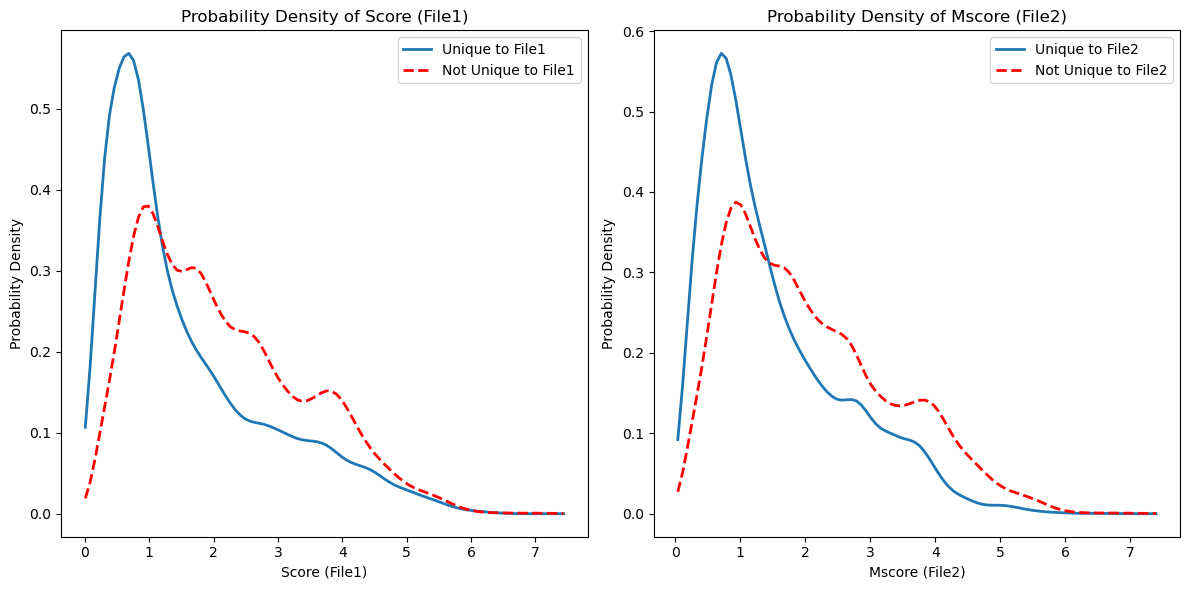

In [37]:
plot_unique_value_distributions(file1, file2, ['Mscore (Magnum)', 'Score (Magnum)'], take_log=False)

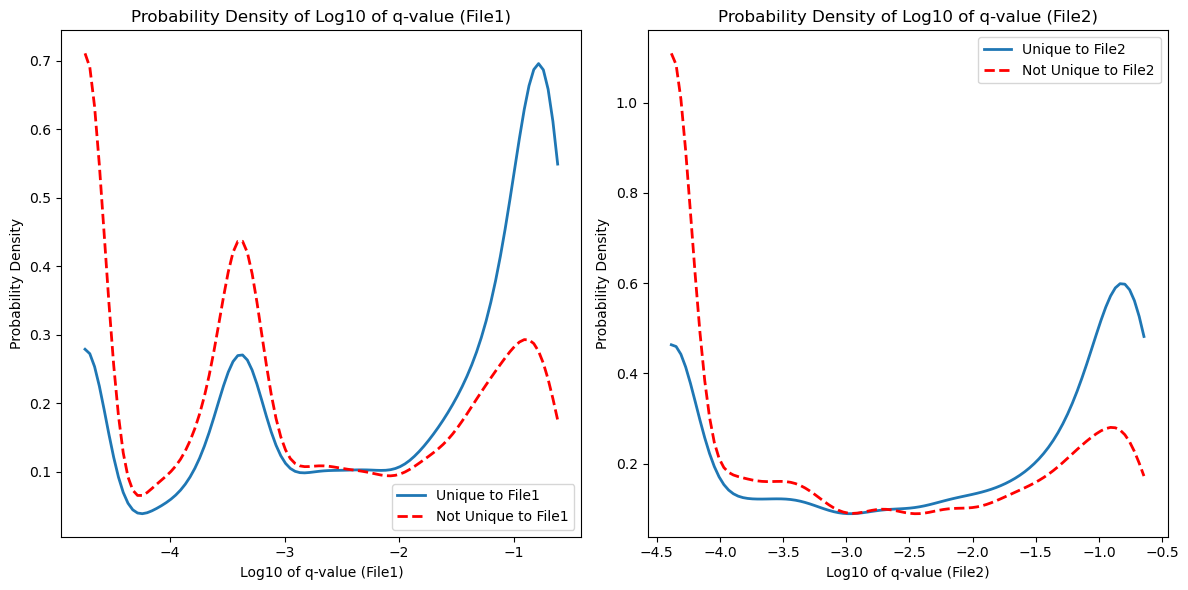

In [38]:
plot_unique_value_distributions(file1, file2, ['q-value (Percolator)'], take_log=True)